#### Random Forest Algorithm
    ensemble learning => process of combining multiple classifiers to solve a complex problem and to improve the performance of the model
    
<img src='./images/random_forest1.png' style="height: 450px; width: 700px; margin-left:350px"></img>

In [2]:
import pandas as pd
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

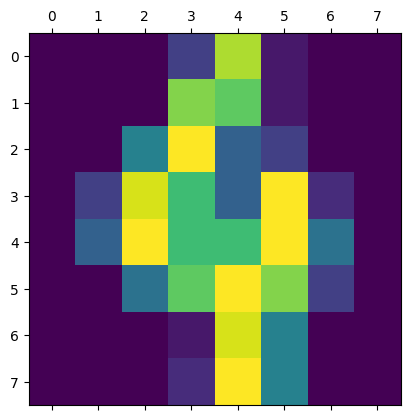

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.matshow(digits.images[97])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = digits.data
Y = digits.target

def func(X, Y, t=0.2, n=100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=t, random_state=10)
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train, Y_train)
    return model.score(X_test, Y_test)

func(X,Y)

0.9666666666666667

Text(0, 0.5, 'Accuracy(%)')

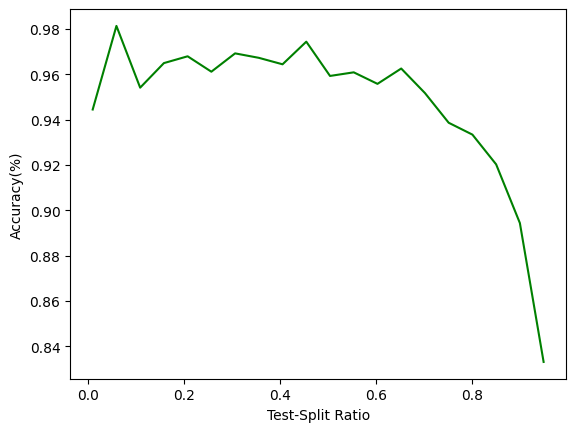

In [6]:
import numpy as np

t = np.linspace(0.01, 0.95, 20)
x = []

for i in t:
    x.append(func(X,Y,i))

plt.plot(t, x, color='green')
plt.xlabel('Test-Split Ratio')
plt.ylabel('Accuracy(%)')

Text(0, 0.5, 'Accuracy(%)')

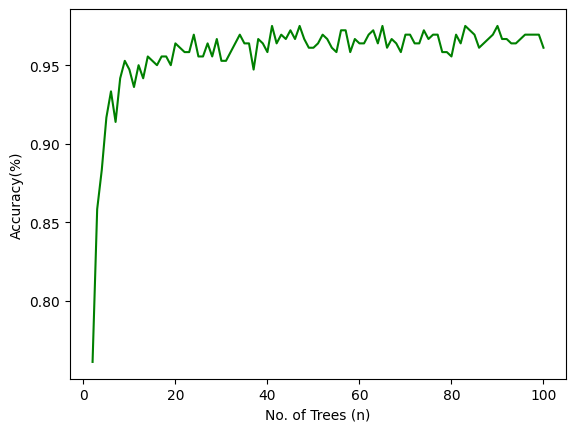

In [7]:
import numpy as np

n = np.linspace(2, 100, 99)
x = []

for i in n:
    x.append(func(X,Y,n=int(i)))

plt.plot(n, x, color='green')
plt.xlabel("No. of Trees (n)")
plt.ylabel('Accuracy(%)')

In [8]:
# plotting a confusion matrix to analyze where the model performs poor and where it works properly
from sklearn.metrics import confusion_matrix

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)

Y_predicted = model.predict(X_test)

cm = confusion_matrix(Y_test, Y_predicted)
cm

array([[36,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 31,  2,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  1],
       [ 0,  1,  1,  1,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 36]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

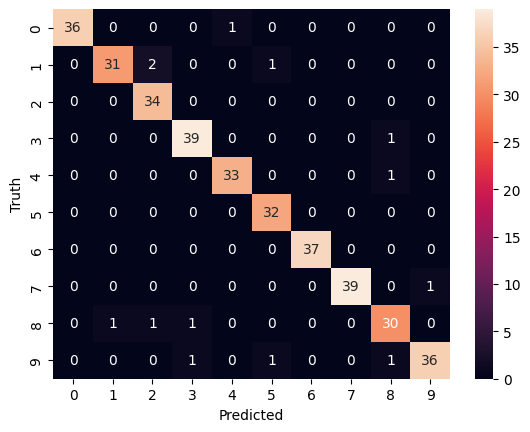

In [9]:
import seaborn as sn

sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')